In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


from collections import defaultdict
from scipy.stats.stats import pearsonr
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist, squareform
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
df = pd.read_csv('training.csv')

In [3]:
df['MMRAcquisitionAuctionAveragePrice'].fillna(df['MMRAcquisitionAuctionAveragePrice'].median(), inplace = True)
df['MMRAcquisitionAuctionCleanPrice'].fillna(df['MMRAcquisitionAuctionCleanPrice'].median(), inplace = True)
df['MMRAcquisitionRetailAveragePrice'].fillna(df['MMRAcquisitionRetailAveragePrice'].median(), inplace = True)
df['MMRAcquisitonRetailCleanPrice'].fillna(df['MMRAcquisitonRetailCleanPrice'].median(), inplace = True)
df['MMRCurrentAuctionAveragePrice'].fillna(df['MMRCurrentAuctionAveragePrice'].median(), inplace = True)
df['MMRCurrentAuctionCleanPrice'].fillna(df['MMRCurrentAuctionCleanPrice'].median(), inplace = True)
df['MMRCurrentRetailAveragePrice'].fillna(df['MMRCurrentRetailAveragePrice'].median(), inplace = True)
df['MMRCurrentRetailCleanPrice'].fillna(df['MMRCurrentRetailCleanPrice'].median(), inplace = True)

In [4]:
df['MMR_factor'] = ( df['MMRAcquisitionAuctionAveragePrice'] + df['MMRAcquisitonRetailCleanPrice'] + df['MMRCurrentAuctionCleanPrice'] + df['MMRCurrentRetailAveragePrice']) / 4

In [5]:
df.isnull().sum() # Check if there are some numerical attributes with missing values

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  1911
SubModel                                 7
Color                                    7
Transmission                             8
WheelTypeID                           2573
WheelType                             2577
VehOdo                                   0
Nationality                              4
Size                                     4
TopThreeAmericanName                     4
MMRAcquisitionAuctionAveragePrice        0
MMRAcquisitionAuctionCleanPrice          0
MMRAcquisitionRetailAveragePrice         0
MMRAcquisitonRetailCleanPrice            0
MMRCurrentAuctionAveragePrice            0
MMRCurrentA

In [6]:
df_new = df[['VehicleAge','VehOdo','MMR_factor','VehBCost','WarrantyCost']] #Create new dataframe the variables that we'll use in the clustering

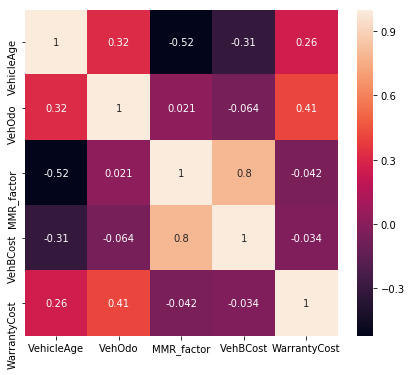

In [7]:
# check the correlation because we don't want clusters with two attributes highly correlated
corr = df_new.corr()
plt.subplots(figsize =(7, 6))
hm = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

In [8]:
Q1 =  df_new.quantile(0.25)
Q3 = df_new.quantile(0.75)
IQR = Q3 - Q1

In [9]:
df_in = df_new[(df_new > Q1-1.5*IQR ) & (df_new < Q3+1.5*IQR)]

In [10]:
df_in['VehBCost'].fillna(df['VehBCost'].median(), inplace = True)
df_in['WarrantyCost'].fillna(df['WarrantyCost'].median(), inplace = True)
df_in['VehicleAge'].fillna(df['VehicleAge'].median(), inplace = True)
df_in['MMR_factor'].fillna(df['MMR_factor'].median(), inplace = True)
df_in['VehOdo'].fillna(df['VehOdo'].median(), inplace = True)

In [11]:
df_in.isnull().sum()

VehicleAge      0
VehOdo          0
MMR_factor      0
VehBCost        0
WarrantyCost    0
dtype: int64

In [100]:
df1 = noise[['VehBCost','VehicleAge','VehOdo']]

In [101]:
X = MinMaxScaler().fit_transform(df1.values)

In [102]:
kmeans = KMeans(n_clusters = 7, n_init = 7, max_iter = 150)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
    n_clusters=7, n_init=7, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [103]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]),
 array([10139, 10647,  9050, 10232,  5021,  7054,  5671], dtype=int64))

In [104]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 10139, 1: 10647, 2: 9050, 3: 10232, 4: 5021, 5: 7054, 6: 5671}

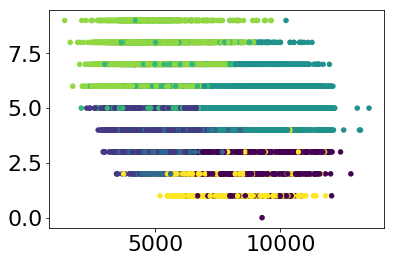

In [106]:
plt.scatter(noise['VehBCost'], noise['VehicleAge'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [107]:
centers = kmeans.cluster_centers_

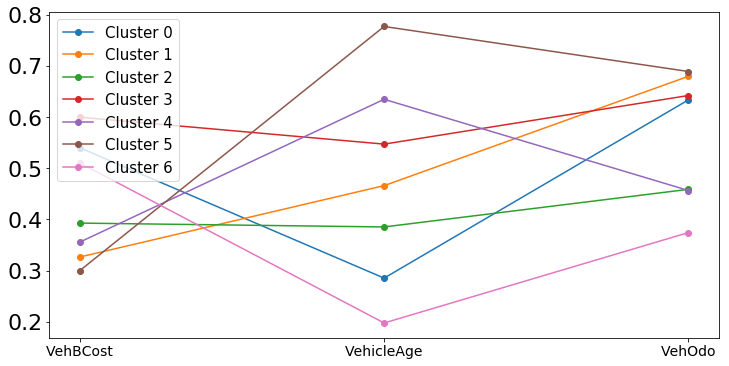

In [108]:
plt.figure(figsize=(12, 6))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(df1.columns)), df1.columns, fontsize=14)
plt.legend(fontsize=15)
plt.show()

In [109]:
# MMR_factor-warrantycost: sse 145 sil 0.35
# MMR_factor-vehicleage: sse 235 sil 0.485
# vehbcost-vehicleage: sse 149 sil 0.58 BEST VALUES 2
# vehbcost-vehicleage-warranty: sse 460 sil 0.33 BEST VALUES 3
# vehbcost-vehicleage-vehodo: sse 637 sil 0.32
#
print('SSE %s' % kmeans.inertia_)  #sse 93 sil 0.35 with warranty and vehbcost with outliers: sse 799 sli 0.33
print('Silhouette %s' % silhouette_score(X, kmeans.labels_,sample_size = 5000)) #sse 345 sil 0,26 adding vehodo

SSE 1241.8752460276976
Silhouette 0.2754017079754248


In [27]:
sse_list = list()
max_k = 20
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X)
    
    sse = kmeans.inertia_
    sse_list.append(sse)

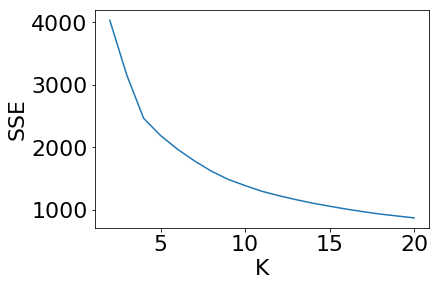

In [28]:
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [29]:
#DBSCAN

In [21]:
df_new.head()

,VehicleAge,VehOdo,MMR_factor,VehBCost,WarrantyCost
0,2,61184,8685.25,6100.0,533
1,3,92383,6459.25,4000.0,1630
2,2,45965,9635.50,7500.0,693
3,4,80169,6217.00,4725.0,1633
4,4,77372,6551.25,5670.0,1623


In [62]:
df2 = df_new[['VehOdo','WarrantyCost','VehBCost']]

In [63]:
Y = StandardScaler().fit_transform(df2.values)

In [93]:
dbscan = DBSCAN(eps = 0.9, min_samples = 150)
dbscan.fit(Y)

DBSCAN(algorithm='auto', eps=0.9, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=150, n_jobs=None, p=None)

In [94]:
np.unique(dbscan.labels_,return_counts = True)

(array([-1,  0,  1], dtype=int64), array([  361, 57814,   211], dtype=int64))

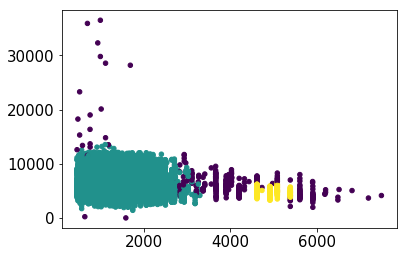

In [95]:
plt.scatter(df2['WarrantyCost'], df2['VehBCost'], c=dbscan.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [96]:
print('Silhouette %s' % silhouette_score(Y, dbscan.labels_,sample_size = 10000))
#Vehbcost-vehodo: 0.30 eps:0.3 sample: 10000 sample: 50 ---> 0.49
#vehodo-warranty: 0.44 eps:0.3 sample: 10000
#vehodo-warranty: 0.61 eps: 0.3 sapmle: 100
#vehodo-warranty: 0.64 eps: 0.3 sample: 50 ---- eps:0.5 sse 0.63
#vehodo-mmr: 0.37 eps:0.3 sample:50
#vehodo-warranty-vehbcost: 0.41 eps: 0.3 sample 50
#vehodo-warranty-mmr_factor: 0.18 eps: 0.3 sample 50
#vehodo-warranty-vehbcost: 0.52 eps: 0.7 sample 50
#vehodo-warranty-vehbcost: 0.59 eps: 0.8 sample 50
#vehodo-warranty-vehbcost: 0.59 eps: 0.9 sample 50
#vehodo-warranty-vehbcost: 0.64 eps: 0.9 sample 150  BEST VALUE
#vehodo-warranty-vehbcost: 0.63 eps: 0.8 sample 140
#vehodo-warranty-vehbcost: 0.63 eps: 0.8 sample 160
#vehodo-warranty-vehbcost: 0.62 eps: 0.8 sample 150 

Silhouette 0.6139682113749121


In [36]:
from scipy.spatial.distance import pdist, squareform

In [ ]:
K = df2.sample(n=10000)

In [40]:
df2.describe()

,VehOdo,VehBCost,WarrantyCost
count,58386.000000,58386.000000,58386.000000
mean,71680.574278,6715.014713,1242.049845
std,14256.382026,1720.064459,495.149042
min,30833.000000,1915.000000,462.000000
25%,62031.250000,5430.000000,837.000000
50%,73357.000000,6700.000000,1155.000000
75%,82425.000000,7895.000000,1543.000000
max,112029.000000,11600.000000,2799.000000


In [41]:
K.describe()

,VehOdo,VehBCost,WarrantyCost
count,10000.000000,10000.000000,10000.000000
mean,71672.758244,6704.372788,1243.210182
std,14043.247913,1710.604667,491.983478
min,30906.000000,2085.000000,462.000000
25%,62013.250000,5425.000000,837.000000
50%,73343.500000,6700.000000,1169.000000
75%,82214.500000,7890.000000,1545.000000
max,109408.000000,11585.000000,2795.000000


In [55]:
S = StandardScaler().fit_transform(df2.values)

In [58]:
dist = pdist(K, 'euclidean') 
print (dist)
dist = squareform(dist) 
print()
print(dist)

[25545.14893282 19878.75524272  3488.44506908 ... 14683.00163454
  4616.66080625 10129.00972455]

[[    0.         25545.14893282 19878.75524272 ...  8619.6786483
  22511.7276325  12609.58893065]
 [25545.14893282     0.         45400.64988522 ... 17367.79266343
   4091.13908343 12967.1133642 ]
 [19878.75524272 45400.64988522     0.         ... 28193.2894498
  42303.11753287 32437.45028513]
 ...
 [ 8619.6786483  17367.79266343 28193.2894498  ...     0.
  14683.00163454  4616.66080625]
 [22511.7276325   4091.13908343 42303.11753287 ... 14683.00163454
      0.         10129.00972455]
 [12609.58893065 12967.1133642  32437.45028513 ...  4616.66080625
  10129.00972455     0.        ]]


In [43]:
k = 20
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

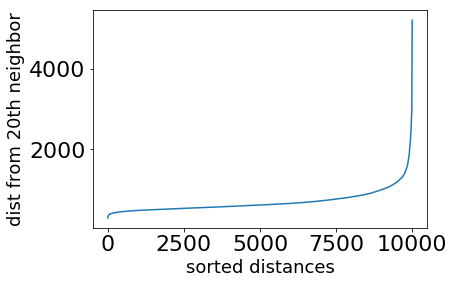

In [44]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [46]:
#HIERARCHICAL

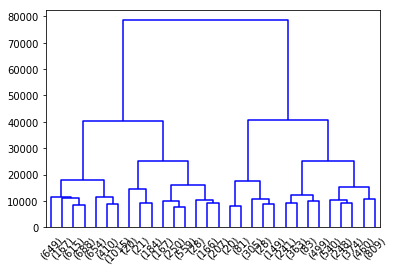

In [60]:
data_dist = pdist(K, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=1.0, truncate_mode='lastp')

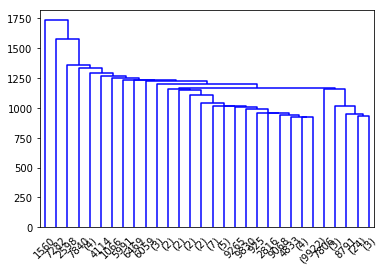

In [47]:
data_dist = pdist(K, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.2, truncate_mode='lastp')

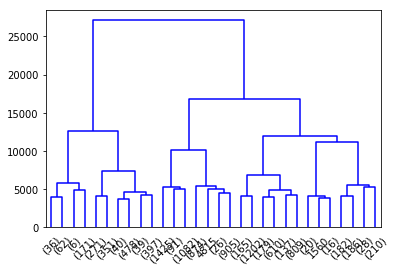

In [48]:
data_dist = pdist(K, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.4, truncate_mode='lastp')

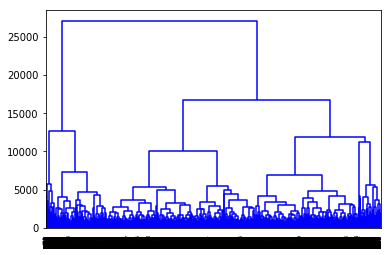

In [49]:
res = dendrogram(data_link, color_threshold=1.0)

In [ ]:
# EXPERIMENT

In [97]:
df_new['labels'] = dbscan.labels_

C:\Users\bonin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [98]:
noise = df_new[df_new['labels'] == 0]

In [111]:
noise.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57040 entries, 0 to 58385
Data columns (total 6 columns):
VehicleAge      57040 non-null int64
VehOdo          57040 non-null int64
MMR_factor      57040 non-null float64
VehBCost        57040 non-null float64
WarrantyCost    57040 non-null int64
labels          57040 non-null int64
dtypes: float64(2), int64(4)
memory usage: 3.0 MB


In [112]:
noise.head()

,VehicleAge,VehOdo,MMR_factor,VehBCost,WarrantyCost,labels
0,2,61184,8685.25,6100.0,533,0
1,3,92383,6459.25,4000.0,1630,0
2,2,45965,9635.50,7500.0,693,0
3,4,80169,6217.00,4725.0,1633,0
4,4,77372,6551.25,5670.0,1623,0


In [113]:
A = StandardScaler().fit_transform(noise.values)

In [ ]:
dbscan = DBSCAN(eps = 0.8, min_samples = 100)
dbscan.fit(A)

In [126]:
np.unique(dbscan.labels_,return_counts = True)

(array([-1,  0], dtype=int64), array([ 1019, 56021], dtype=int64))

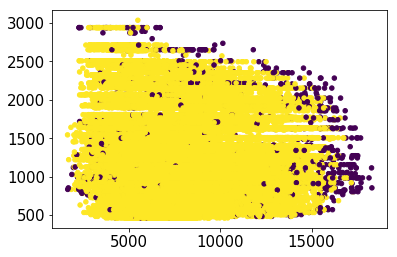

In [127]:
plt.scatter(noise['MMR_factor'], noise['WarrantyCost'], c=dbscan.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [130]:
print('Silhouette %s' % silhouette_score(A, dbscan.labels_,sample_size = 5000))

Silhouette 0.29718369605392325


In [131]:
kmeans = KMeans(n_clusters = 6, n_init = 7, max_iter = 150)
kmeans.fit(A)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
    n_clusters=6, n_init=7, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [132]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5]),
 array([11809,  9414,  9643,  7759, 10006,  8409], dtype=int64))

In [135]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 11809, 1: 9414, 2: 9643, 3: 7759, 4: 10006, 5: 8409}

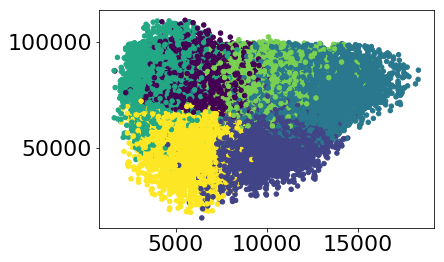

In [136]:
plt.scatter(noise['MMR_factor'], noise['VehOdo'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [146]:
print('SSE %s' % kmeans.inertia_)  #sse 866 silhouette: 0.25 #sse 386 silhouette
print('Silhouette %s' % silhouette_score(A, kmeans.labels_,sample_size = 5000))

SSE 111634.0508693229
Silhouette 0.2014989762867617


In [142]:
A = MinMaxScaler().fit_transform(noise.values)

In [50]:
noise

,VehicleAge,VehOdo,MMR_factor,VehBCost,WarrantyCost,labels
0,2,61184,8685.25,6100.0,533,0
1,3,92383,6459.25,4000.0,1630,0
2,2,45965,9635.50,7500.0,693,0
3,4,80169,6217.00,4725.0,1633,0
4,4,77372,6551.25,5670.0,1623,0
5,2,24541,5175.50,5430.0,462,0
6,5,81478,8808.75,7675.0,723,0
7,1,56717,9929.00,7810.0,920,0
8,4,34616,6912.50,5870.0,462,0
9,3,57337,4815.50,4825.0,505,0


In [99]:
noise

,VehicleAge,VehOdo,MMR_factor,VehBCost,WarrantyCost,labels
0,2,61184,8685.25,6100.0,533,0
1,3,92383,6459.25,4000.0,1630,0
2,2,45965,9635.50,7500.0,693,0
3,4,80169,6217.00,4725.0,1633,0
4,4,77372,6551.25,5670.0,1623,0
5,2,24541,5175.50,5430.0,462,0
6,5,81478,8808.75,7675.0,723,0
7,1,56717,9929.00,7810.0,920,0
8,4,34616,6912.50,5870.0,462,0
9,3,57337,4815.50,4825.0,505,0
